In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import font_manager
# plt.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

data- keys :
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
data.shape :(1797, 64)


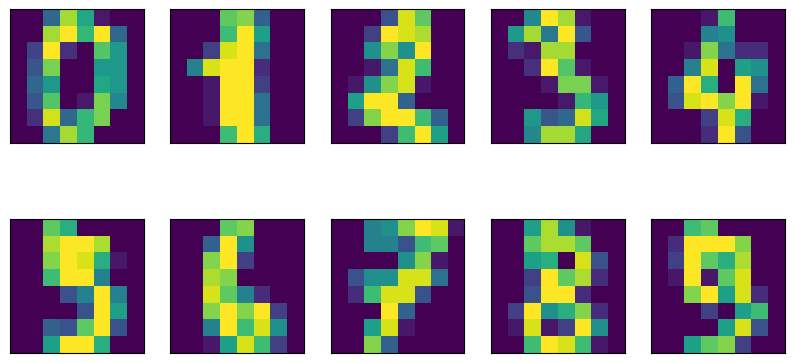

In [2]:
## digits data
from sklearn.datasets import load_digits
digits = load_digits()
print(f"data- keys :\n {digits.keys()}")
print(f"data.shape :{digits.data.shape}")

# data, labels = load_digits(return_X_y=True)
# (n_samples, n_features), n_digits = data.shape, np.unique(labels).size
# print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

fig, axes = plt.subplots(2,5,figsize=(10,5),
                        subplot_kw = {'xticks':(), 'yticks':()})
for ax, imgs in zip(axes.ravel(), digits.images):
    ax.imshow(imgs)

In [3]:
type(digits.data[0:3])

numpy.ndarray

#### kmean

In [4]:
# Kmean
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=10,random_state=0)
km_clusters = k_means.fit_predict(digits.data)
k_means.cluster_centers_.shape
print(km_clusters.shape)

(1797,)


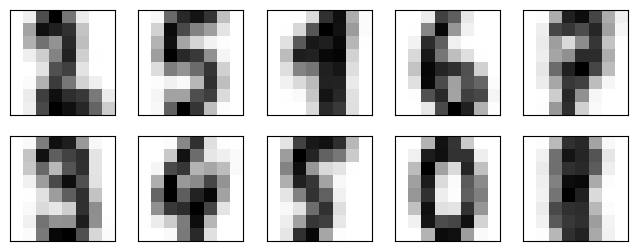

In [5]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) 
centers = k_means.cluster_centers_.reshape(10,8,8) 
for axi, center in zip(ax.flat, centers): 
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary) 

In [6]:
km_labels = np.zeros_like(km_clusters) # blank labels 
print(f"The labels are : {km_labels}")
print(f"\nThe size of labels is : {km_labels.shape}")
print("The mask values are : ")
for i in range(10): 
    mask = (km_clusters == i) 
    print(mask)
    km_labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False  True  True ...  True False False]


In [8]:
accuracy = "{:.2f}".format(accuracy_score(digits.target, km_labels)*100)
print(f"Accuracy: {accuracy}%")

Accuracy: 74.40%


Text(113.9222222222222, 0.5, 'Predicted Label')

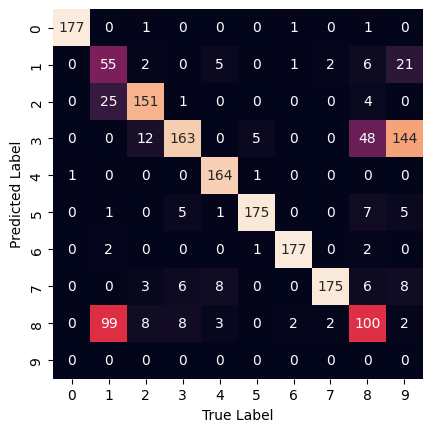

In [10]:
matrix = confusion_matrix(digits.target, km_labels)
sns.heatmap(matrix.T, square = True, annot = True,
           fmt = 'd', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('True Label')
plt.ylabel("Predicted Label")

### PCA

Text(0, 0.5, '두 번째 주성분')

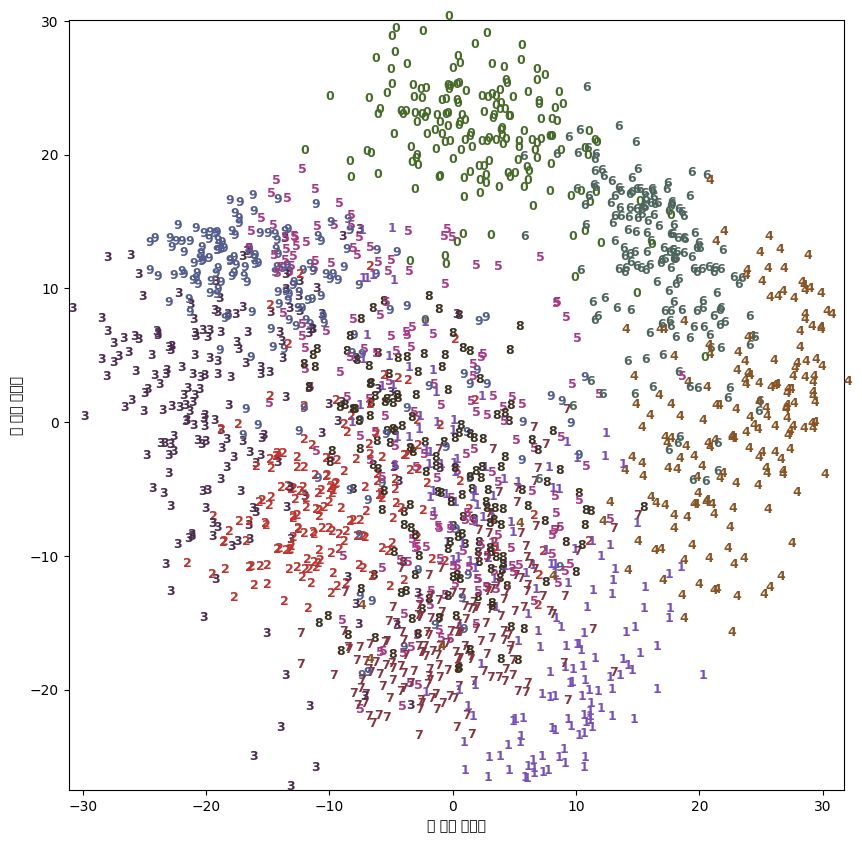

In [11]:
# pca
from sklearn.decomposition import PCA
#2차원으로 축소
pca = PCA(n_components=2)
pca.fit(digits.data)
#처음 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]] ,fontdict={'weight': 'bold', 'size':9}           )
##fontdict={'weight': 'bold', 'size':9}
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

### T-sne

Text(0, 0.5, 't-SNE 특성 1')

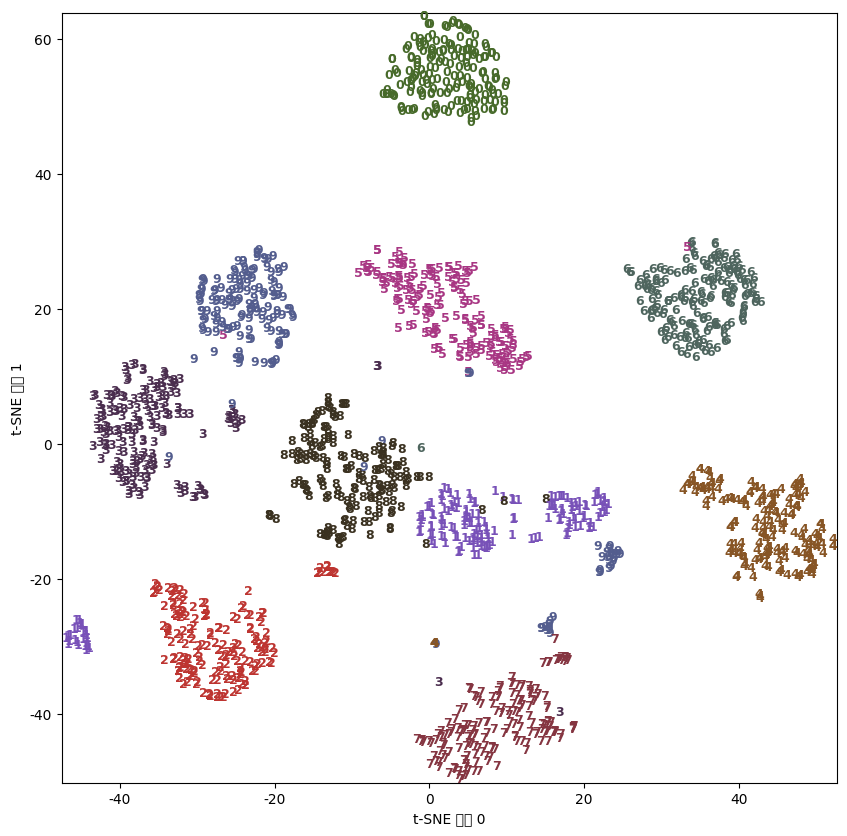

In [12]:
from sklearn.manifold import TSNE
plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
#TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight':'bold','size':9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

### SOM - 예제 그래프 수정 필요

In [ ]:
from som import Som
from pylab import plot,axis,show,pcolor,colorbar,bone
digits = load_digits()
data = digits.data
labels = digits.target

som = Som(16,16,64,sigma=1.0,learning_rate=0.5)
som.random_weights_init(data)
print("Initiating SOM.")
som.train_random(data,10000) 
print("\n. SOM Processing Complete")

bone()
pcolor(som.distance_map().T) 
colorbar()

In [ ]:
labels[labels == '0'] = 0
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt,xx in enumerate(data):
   w = som.winner(xx) 
   plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],    
   markerfacecolor='None', markeredgecolor=colors[labels[cnt]], 
   markersize=12, markeredgewidth=2)
   axis([0,som.weights.shape[0],0,som.weights.shape[1]])
   show()